# Сборный проект
**Поиск закономерностей, определяющих успех компьютерной игры**

**Описание проекта:**

*Потенциальный заказчик:* Интернет-магазин «Стримчик», который продаёт по всему миру компьютерные игры. 


*Цель:* **Выявить определяющие успех игры закономерности**. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

В распоряжении исследователя исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation) до 2016 года (из открытых источников)

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Описание данных**
* **Name** — название игры
* **Platform** — платформа
* **Year_of_Release** — год выпуска
* **Genre** — жанр игры
* **NA_sales** — продажи в Северной Америке (миллионы проданных копий)
* **EU_sales** — продажи в Европе (миллионы проданных копий)
* **JP_sales** — продажи в Японии (миллионы проданных копий)
* **Other_sales** — продажи в других странах (миллионы проданных копий)
* **Critic_Score** — оценка критиков (максимум 100)
* **User_Score** — оценка пользователей (максимум 10)
* **Rating** — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

## Выгрузка данных

In [1]:
#импорт необходимых для исследования библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from scipy import stats as st
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/datasets/games.csv') #выгрузка датасета
pd.set_option('display.max_columns', 50) #вывод всех столбцов (без точек)
display(data.head(10)) #первые 10 строк датасета
data.info() #вывод общей информации для датасета (идентификация типов данных и количества пропусков)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [3]:
data.isna().sum() #идентификация количества пропусков в каждой переменной

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [4]:
data.duplicated().sum() #проверка на наличие явных дубликатов

0

Явных дубликатов нет, можно двигаться дальше

Из примечательного:
* Тип данных года выпуска
* Тип данных оценки пользователей
* Большое количество пропусков в переменных "User_Score", "Critic_Score", "Rating"

## Подготовка данных

**Работа с пропусками**

Переменная        |    Возможная причина появления пропусков
-------------       |  -------------
Name        |  возможно, ошибка переноса данных. Пропусков этой переменной достаточно мало - данными можно попробовать пренебречь
**Year_of_Release**  |  возможно, ошибка переноса данных. Пропусков этой переменной достаточно мало - данными можно попробовать пренебречь
Genre    |  возможно, ошибка переноса данных. Пропусков этой переменной достаточно мало - данными можно попробовать пренебречь
Critic_Score         |  критики могли не оставить оценку
**User_Score**       |  пользователи могли не оставить оценку
Rating     | не все игры могли попасть в рейтинг (возможно, в выборке присутствуют более редкие игры) - категория игры не может быть достоверно определена

**жирным шрифтом** выделены переменные, которые нуждаются в обработке

* Название игры пропущено в двух случаях - 0,01% от общего числа наблюдений -> ими можно принебречь

* Пропуски в переменной жанра игры также пропущены дважды -> можно принебречь

* Год выпуска пропущен в 269 случаях - 1,6% < 10% датасета -> ими можно принебречь

*Вспомогательная проверка*

In [5]:
data.query('Name.isna()')

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Переменные Name и Genre пропущены в двух одинаковых наблюдениях -> потерь данных будет меньше, чем предполагалось (на 2 позиции)

In [6]:
data = data.query('(~Name.isna()) and ~(Year_of_Release.isna())') #очистка от пропущенных значений
data.isna().sum() #доказательство того, что пропуски в изучаемых переменных устранены

Name                  0
Platform              0
Year_of_Release       0
Genre                 0
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8461
User_Score         6605
Rating             6676
dtype: int64

In [7]:
#Вычисление процентов пропусков
print('Доля пропущенных в столбце "Critic_Score" значений составляет {:.5%}'.format(data['Critic_Score'].isna().sum()/len(data)))
print('Доля пропущенных в столбце "User_Score" значений составляет {:.5%}'.format(data['User_Score'].isna().sum()/len(data)))
print('Доля пропущенных в столбце "Rating" значений составляет {:.5%}'.format(data['Rating'].isna().sum()/len(data)))

Доля пропущенных в столбце "Critic_Score" значений составляет 51.45342%
Доля пропущенных в столбце "User_Score" значений составляет 40.16663%
Доля пропущенных в столбце "Rating" значений составляет 40.59839%


Доля пропущенных значений в рассматриваемых выше столбцах слишком велика -> пренебрегать нельзя

Заменить пропущенные оценки проблематично - медианные/средние оценки не будут достаточно информативными. 
Например, игры, две игры, выпущенные на одной и той платформе, могут быть по-разному оценены (какой-то проект более удачный, какой-то менее). Замена пропусков в этом случае может привести к ошибкам.

Целесообразно на данном этапе оставить пропуски

*К тому же, был дан комментарий о том, что данные за 2016 год могут быть неполными - это также могло повлиять на количество пропусков*

**Приведение столбцов к нижнему регистру**

In [8]:
data.columns = [x.lower() for x in data.columns]
print(data.columns) #проверка того, что названия столбцов корректно изменены

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


**Изменение типов данных**

Год выпуска лучше преобразовать в целочисленный вид

In [9]:
#Преобразование данных из столбца "year_of_release" в целочисленный вид
#data['year_of_release'] = [int(x) for x in data['year_of_release']]

In [10]:
data['year_of_release'] = data['year_of_release'].astype('int')

Переменная "User_Score" не является строкой - необходимо преобразовать тип

In [11]:
#Преобразование данных из столбца "user_score"
#data['user_score'] = data['user_score'].astype('float') #- не работает
#data['user_score'] = pd.to_numeric(data['user_score']) #- не работает
#data['user_score'] = [float(x) for x in data['user_score']] #- не работает

print(data['user_score'].unique()) #поиск источника проблемы - 'nan'
data['user_score'] = data['user_score'].replace('tbd', np.nan)
data['user_score'] = data['user_score'].astype('float')

data.info() #проверка того, что тип данныхх в исследуемом столбце преобразован

['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64


In [12]:
#Проверка на наличие дубликатов
print(data['name'].unique())

['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ...
 'Woody Woodpecker in Crazy Castle 5' 'LMA Manager 2007'
 'Haitaka no Psychedelica']


In [13]:
print(data['rating'].unique())
#data['rating'] = data['rating'].replace('tbd', np.nan)

['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']


**Создание отдельного столбца с суммарными продажами во всех регионах**

In [14]:
data['total_sales'] = data['na_sales']+data['eu_sales']+data['jp_sales']+data['other_sales']

In [15]:
# Комментарий ревьюера
# Посмотрим, что у нас осталось
temp = data.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
 11  total_sales      16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']
n

In [16]:
def categorize_rating(row):
    value = row['rating']
    
    if value=='AO':
        return('Только для взрослых')
    if value=='E':
        return('Все')
    if value=='E10+':
        return('Все 10+')
    if value=='EC':
        return('Раннее детство')
    if value=='K-A':
        return('Все')
    if value=='M':
        return('17+')
    if value=='RP':
        return('Рейтинг в ожидании')
    if value=='T':
        return('Для подростков')
    else:
        return('Рейтинг не составлен')
    
data['rating_category'] = data.apply(categorize_rating, axis=1) #применение функции к датасету
display(data)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,rating_category
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54,Все
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24,Рейтинг не составлен
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52,Все
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77,Все
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38,Рейтинг не составлен
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01,Рейтинг не составлен
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01,Рейтинг не составлен
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01,Рейтинг не составлен
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01,Рейтинг не составлен


## Исследовательский анализ данных

**Статистика выпуска игр по годам за период с 1980 по 2016**

Text(0, 0.5, 'number of released games')

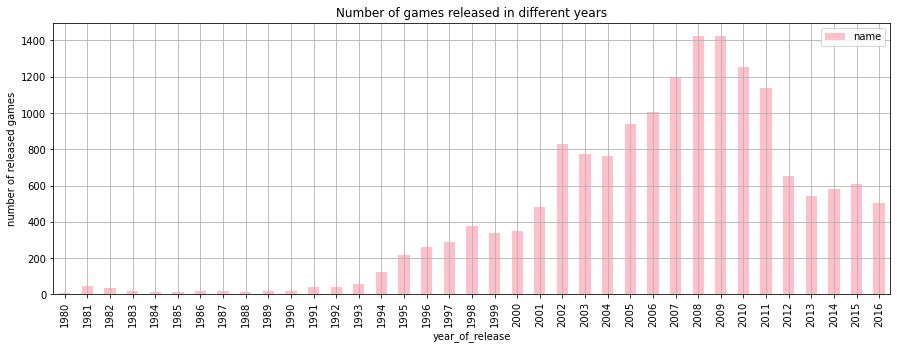

In [17]:
ax = data.pivot_table(index = 'year_of_release', values = 'name', aggfunc = 'count').plot(kind = 'bar', color = 'pink', title = 'Number of games released in different years', grid=True, legend = True, figsize=(15, 5))
ax.set_ylabel("number of released games")

Наибольшее количество игр было выпущено в 2008-2009 годах.
До начала 2000-х было выпущено малое количество игр - выявлять закономерности, определяющие успех той или иной игры лучше на временном промежутке, характеризующимя ростом активности в изучаемой индустрии

**Динамика продаж по платформам**

In [18]:
data['platform'].value_counts().head(10) #идентификация платформ с наибольшим количеством игр

PS2     2127
DS      2121
PS3     1306
Wii     1286
X360    1232
PSP     1193
PS      1190
PC       957
GBA      811
XB       803
Name: platform, dtype: int64

Наибольшее количество игр было выпущено платформами PS2, DS и PS3

In [19]:
#вывод платформ с наибольшими совокупными продажами за весь период
data.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum').sort_values(by = 'total_sales',ascending = False).reset_index().head(10)

,platform,total_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.78
5,PS,727.58
6,PS4,314.14
7,GBA,312.88
8,PSP,289.53
9,3DS,257.81


Наибольшие совокупные продажи приходятся на платформы PS2, X360 и PS3

Text(0, 0.5, 'cumulative sales')

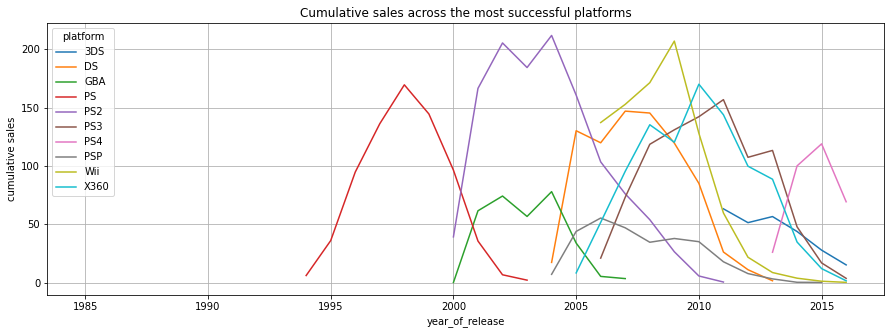

In [20]:
for_platforms = data.query('platform == ["PS2","X360","PS3", "Wii", "DS", "PS", "PS4", "GBA", "PSP", "3DS"]')

ax = for_platforms.pivot_table(index='year_of_release', columns = 'platform', values='total_sales', aggfunc='sum').plot(title = 'Сumulative sales across the most successful platforms', grid=True, figsize=(15, 5))
ax.set_ylabel("cumulative sales")

На графике можно увидеть:
 - почти для каждой "крупной" платформы есть пик продаж (или несколько, если, например, не одна игра имела большой успех), после которого цифры падают, а платформы исчезают
 - с течением времени появляется все больше платформ
 - наиболее "успешные" платформы функционируют около 6-10 лет

**Выделение данных за "актуальный" период**

Тенденции меняются, для построения прогноза лучше обращаться к последним данным из доступных.

Так, рассмотрим период с 2014 по 2016 год

In [21]:
data_new = data.query('year_of_release>=2014')
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1689 entries, 31 to 16714
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1689 non-null   object 
 1   platform         1689 non-null   object 
 2   year_of_release  1689 non-null   int64  
 3   genre            1689 non-null   object 
 4   na_sales         1689 non-null   float64
 5   eu_sales         1689 non-null   float64
 6   jp_sales         1689 non-null   float64
 7   other_sales      1689 non-null   float64
 8   critic_score     718 non-null    float64
 9   user_score       888 non-null    float64
 10  rating           940 non-null    object 
 11  total_sales      1689 non-null   float64
 12  rating_category  1689 non-null   object 
dtypes: float64(7), int64(1), object(5)
memory usage: 184.7+ KB


In [22]:
data_new.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum').sort_values(by = 'total_sales',ascending = False).reset_index().head(5)


,platform,total_sales
0,PS4,288.15
1,XOne,140.36
2,3DS,86.68
3,PS3,68.18
4,X360,48.22


Необходимо отметить, что на наиболее актуальном временном промежутке список "лидеров" преобразовался

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,rating_category
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63,Рейтинг не составлен
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62,17+
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68,Рейтинг не составлен
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58,Все
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98,Рейтинг не составлен
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66,17+
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60,Все
96,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,3.27,1.37,2.43,0.48,NaN,NaN,NaN,7.55,Рейтинг не составлен
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,NaN,7.39,Рейтинг не составлен
105,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,M,7.17,17+


Text(0, 0.5, 'cumulative sales')

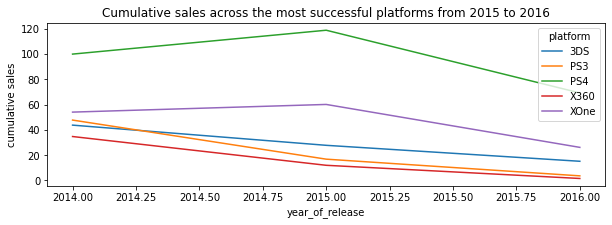

In [23]:
for_platforms1 = data_new.query('platform == ["PS4","XOne","3DS", "PS3", "X360"]')
display(for_platforms1.head(10))
ax = for_platforms1.pivot_table(index='year_of_release', columns = 'platform', values='total_sales', aggfunc='sum').plot(title = 'Сumulative sales across the most successful platforms from 2015 to 2016', grid=False, figsize=(10, 3),legend = True)
ax.set_ylabel("cumulative sales")


- Совокупные продажи по всем "игрокам" изучаемого рынка на промежутке с 2015 по 2016 снижались
- Положение PS4 и XOne на рынке в конце "актуального" периода схоже
- Наиболее "успешными" можно назвать платформы PS4	и XOne

**Построение "Ящика с усами" по глобальным продажам игр в разбивке по платформам**

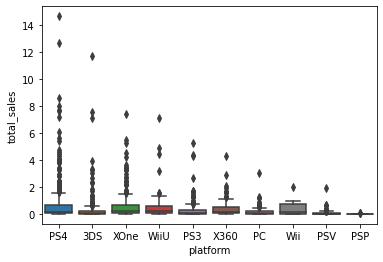

In [25]:
sb.boxplot(data = data_new,x='platform', y='total_sales')
sb.set(rc={'figure.figsize':(30,10)})

Наибольшие выбросы наблюдаются среди игр платформы PS4 и 3DC

(0.0, 1.6)

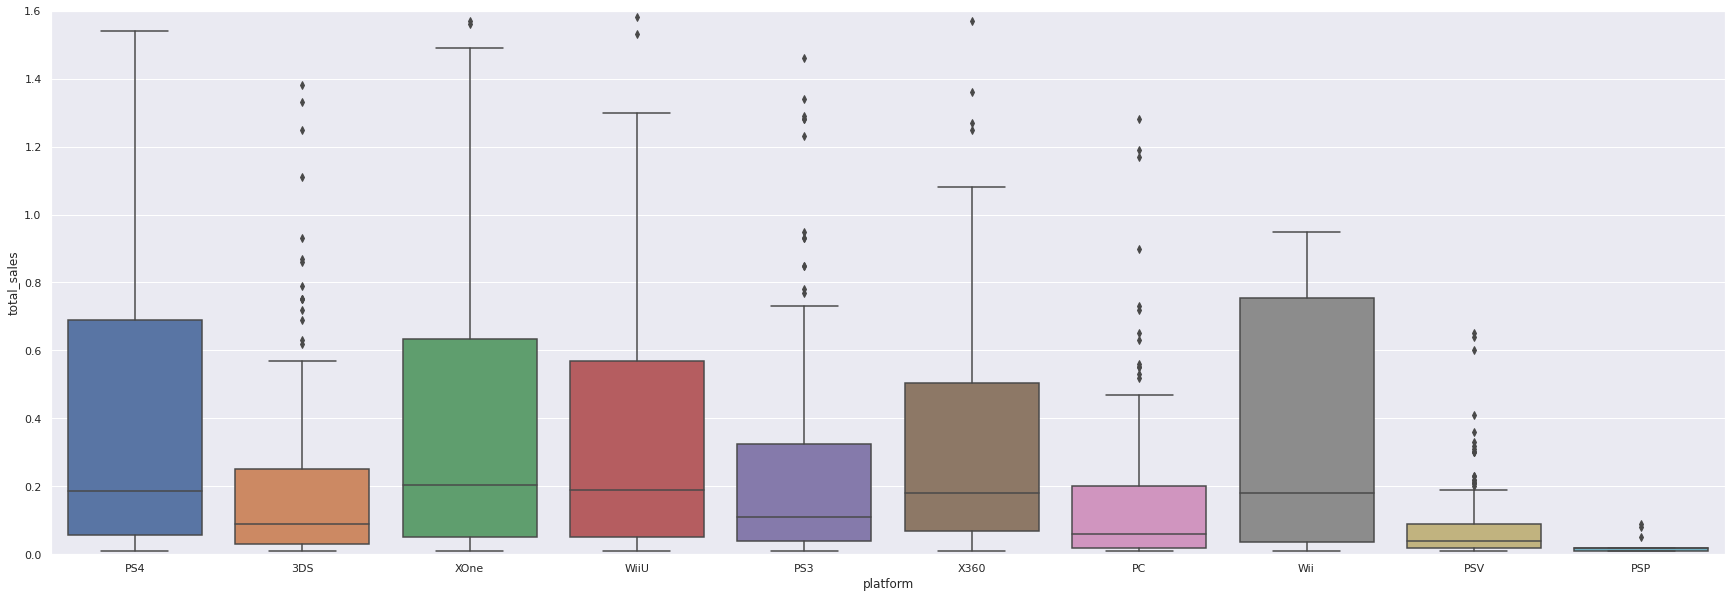

In [26]:
sb.boxplot(data = data_new,x='platform', y='total_sales')
sb.set(rc={'figure.figsize':(30,10)})
plt.ylim(0, 1.6)

Самая высокая медиана: XOne

Высокий межквартильный размах: Wii, PS4, XOne, WiiU

Широкие пределы нормальных значений: PS4, XOne, WiiU, Х360

**Влияние отзывов критиков и пользователей на продажи внутри одной популярной платформы**

В отзывах много пропущенных значений. Прежде чем выбрать одну популярную платформу, необходимо определить, где меньше пропусков

In [27]:
#for_PS4 = data_new.query('platform == "PS4"')
#print('Доля пропущенных значений в столбце "critic_score" среди игр платформы "PS4" составляет {:.5%}'.format(for_PS4['critic_score'].isna().sum()/len(for_PS4)))

for_XOne = data_new.query('platform == "XOne"')
#print('Доля пропущенных значений в столбце "critic_score" среди игр платформы "XOne" составляет {:.5%}'.format(for_XOne['critic_score'].isna().sum()/len(for_XOne)))

In [28]:
#print('Доля пропущенных значений в столбце "user_score" среди игр платформы "PS4" составляет {:.5%}'.format(for_PS4['user_score'].isna().sum()/len(for_PS4)))
#print('Доля пропущенных значений  в столбце "user_score" среди игр платформы "XOne" составляет {:.5%}'.format(for_XOne['user_score'].isna().sum()/len(for_XOne)))

In [29]:
#print('Количество наблюдений в выборке по играм платформы PS4:',len(for_PS4))
#print('Количество наблюдений в выборке по играм платформы XOne:',len(for_XOne))

Пропущенных значений среди игр платформы XOne меньше. Несмотря на то, что игр на этой платформе меньше, можно выбрать ее

**Построение диаграммы рассеяния для оценок критиков**

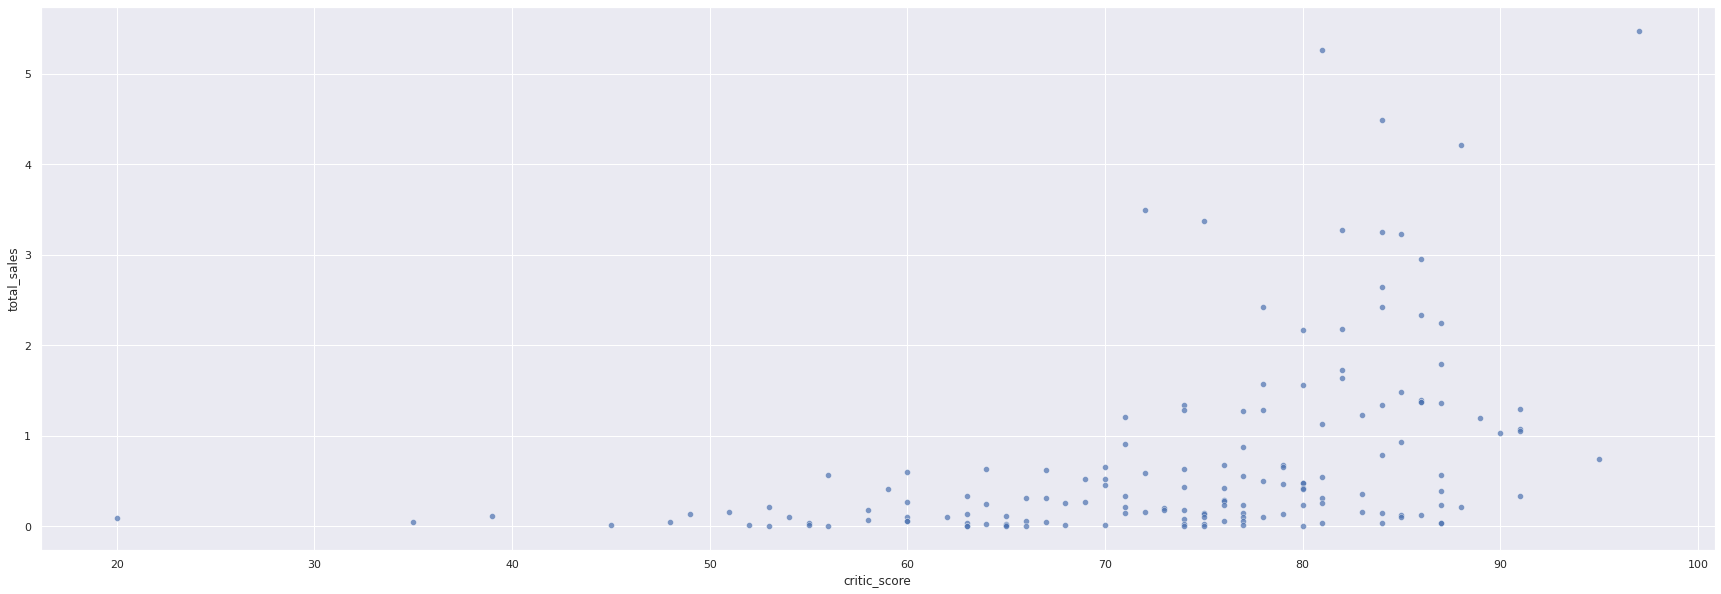

In [30]:
sb.scatterplot(data = for_XOne.query('~critic_score.isna()'), x = 'critic_score', y = 'total_sales', alpha = 0.7)
sb.set(rc={'figure.figsize':(8,4)})
plt.show()

Можно отметить, что в среднем при прочих равных при увеличении оценки критиков увеличиваются и показатели продаж

**Построение диаграммы рассеяния для пользовательских оценок**

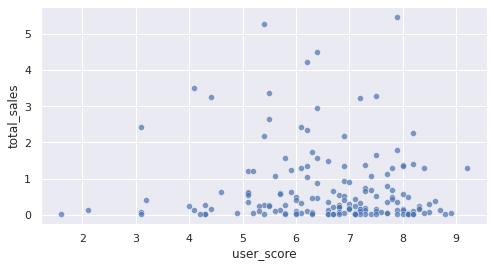

In [31]:
sb.scatterplot(data = for_XOne.query('~user_score.isna()'), x = 'user_score', y = 'total_sales', alpha = 0.7)
sb.set(rc={'figure.figsize':(8,4)})
plt.show()

Для оценок пользователей прямой зависимости на диаграмме рассеяния не видно: Даже при не очень высоких пользовательских оценках продажи могут быть высокими

**Построение корреляционной матрицы**

<AxesSubplot:>

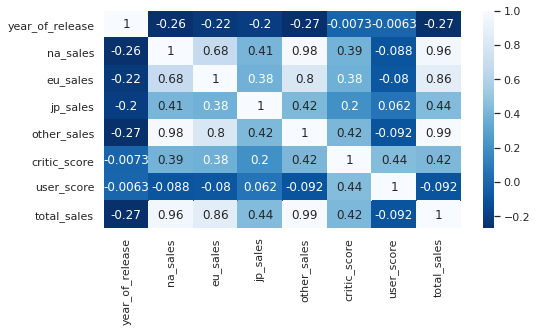

In [32]:
sb.heatmap(for_XOne.query('(~critic_score.isna()) and (~user_score.isna())').corr(), annot = True, cmap = 'Blues_r')

Для экспертных оценок критиков присутствует не очень высокая зависимость, а для пользовательских оценок корреляции нет

In [33]:
print(data_new['platform'].unique()) #чтобы не искать наименования платформ

['PS4' '3DS' 'XOne' 'WiiU' 'PS3' 'X360' 'PC' 'Wii' 'PSV' 'PSP']


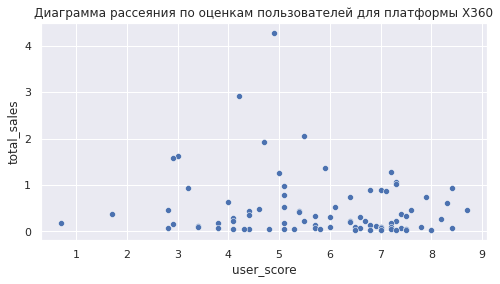

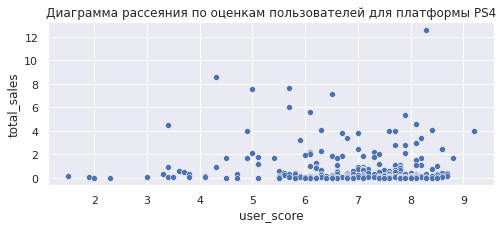

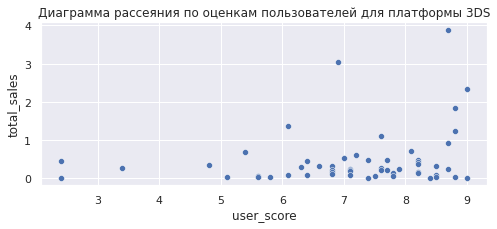

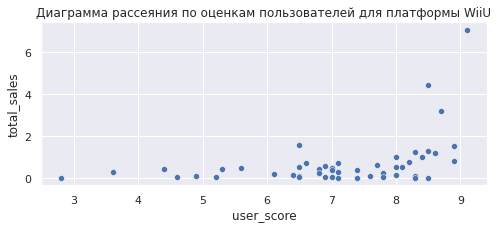

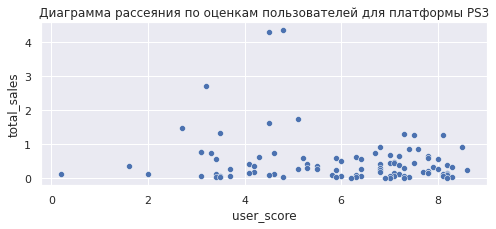

In [34]:
#Сравнение с продажами игр на других платформах
platf = ['X360', 'PS4', '3DS', 'WiiU', 'PS3']

for i in platf:
    data_for_scat = data_new.query('(~user_score.isna()) and (platform == @i)')
    sb.scatterplot(data=data_for_scat, x='user_score', y='total_sales',legend = True)
    sb.set(rc={'figure.figsize':(8,3)})
    plt.title(f'Диаграмма рассеяния по оценкам пользователей для платформы {i}')
    plt.show()

При рассмотрении других платформ мы чаще всего не можем сказать, что при увеличении оценок пользователей показатели продаж увеличиваются (Исключение - платформы WiiU и 3DS)

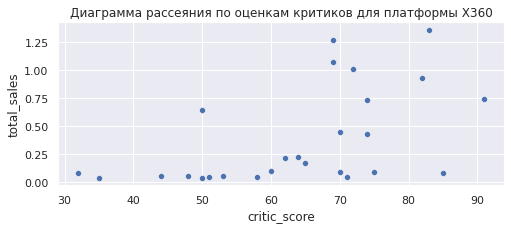

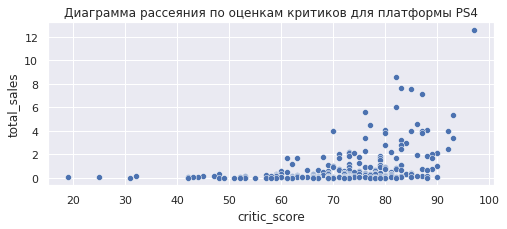

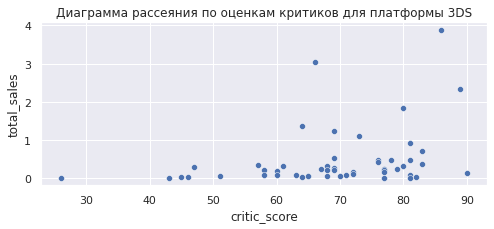

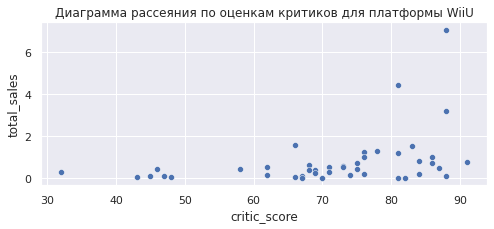

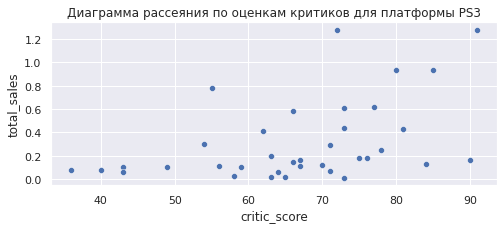

In [35]:
for i in platf:
    data_for_scat = data_new.query('(~critic_score.isna()) and (platform == @i)')
    sb.scatterplot(data=data_for_scat, x='critic_score', y='total_sales',legend = True)
    sb.set(rc={'figure.figsize':(8,3)})
    plt.title(f'Диаграмма рассеяния по оценкам критиков для платформы {i}')
    plt.show()

Чаще всего при увеличении оценки критиков увеличиваются показатели продаж и для остальных платформ, рассматриваемых в рамках проводимого анализа (Исключение - платформы PS3 и X360)

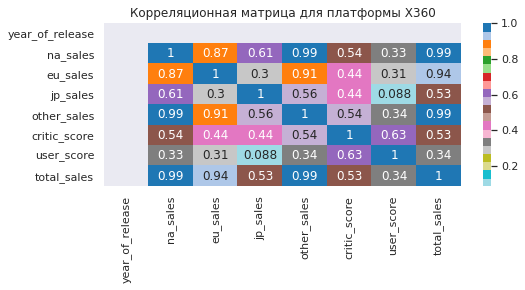

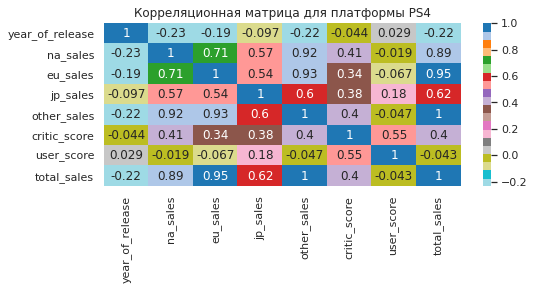

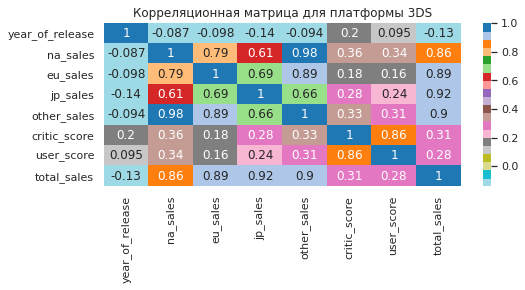

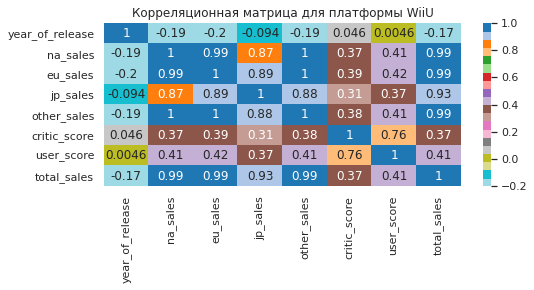

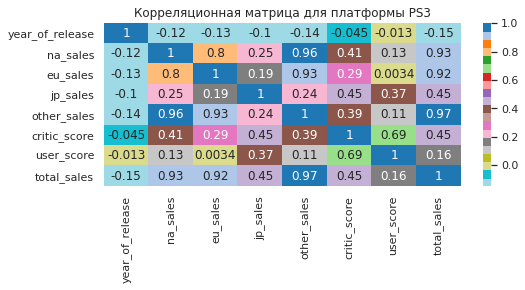

In [36]:
#построение корреляционных матриц для других платформ
for i in platf:
    data_for_corr = data_new.query('(~critic_score.isna()) and (~critic_score.isna()) and (platform == @i)')
    sb.heatmap(data_for_corr.corr(), annot = True, cmap = 'tab20_r')
    plt.title(f'Корреляционная матрица для платформы {i}')
    plt.show()

Для пользовательских оценок, как правило, сильной корреляции нет (Исключение - платформы WiiU)

Для оценок критиков коэффициент корреляции для каждой платформы около 0,4 - не очень сильная, но есть

**Обобщение для продаж на всех платформах**

- Значение корреляции между оценками критиков и совокупными продажами колеблется около 0,4
- Значение корреляции между пользовательскими оценками и совокупными продажами почти для каждой платформы близко к нулю
- В целом результаты схожи с результатами "эталонной" платформы

**Общее распределение игр по жанрам**

Text(0, 0.5, 'sales')

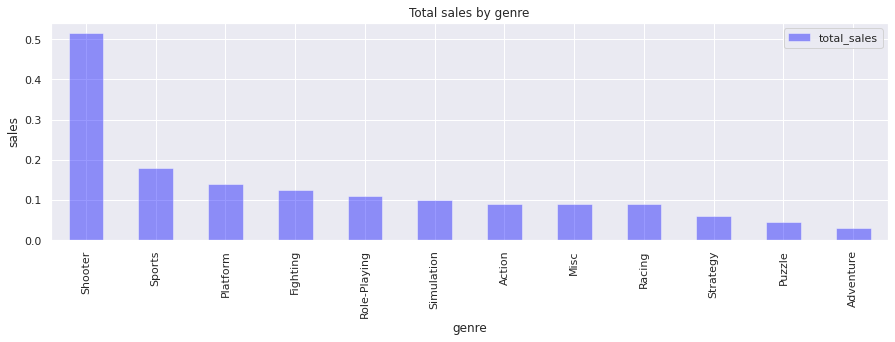

In [40]:
#сводная таблица по продажам в зависимости от жанра - по медианным значениям продаж
for_genre = data_new.pivot_table(index = 'genre', values = 'total_sales', aggfunc = 'median').sort_values(by = 'total_sales',ascending = False) #.reset_index()

ax = for_genre.plot(kind = 'bar', color = 'blue', title = 'Total sales by genre',alpha = 0.4, grid=True, legend = True, figsize=(15, 4))
ax.set_ylabel("sales")


Наибольшее медианное значение наблюдается для жанра "Стрелялки"

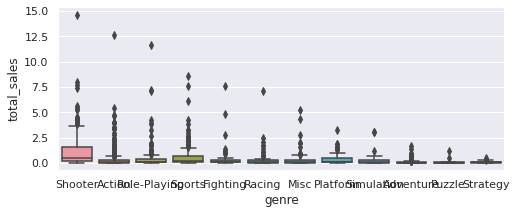

In [41]:
sb.boxplot(data = data_new,x='genre', y='total_sales')
sb.set(rc={'figure.figsize':(30,20)})

Наибльшие выбросы - жанр "Экшен" и ролевые игры

Предел нормальных значений самый высокий у жанра "Стрелялки"

(0.0, 4.0)

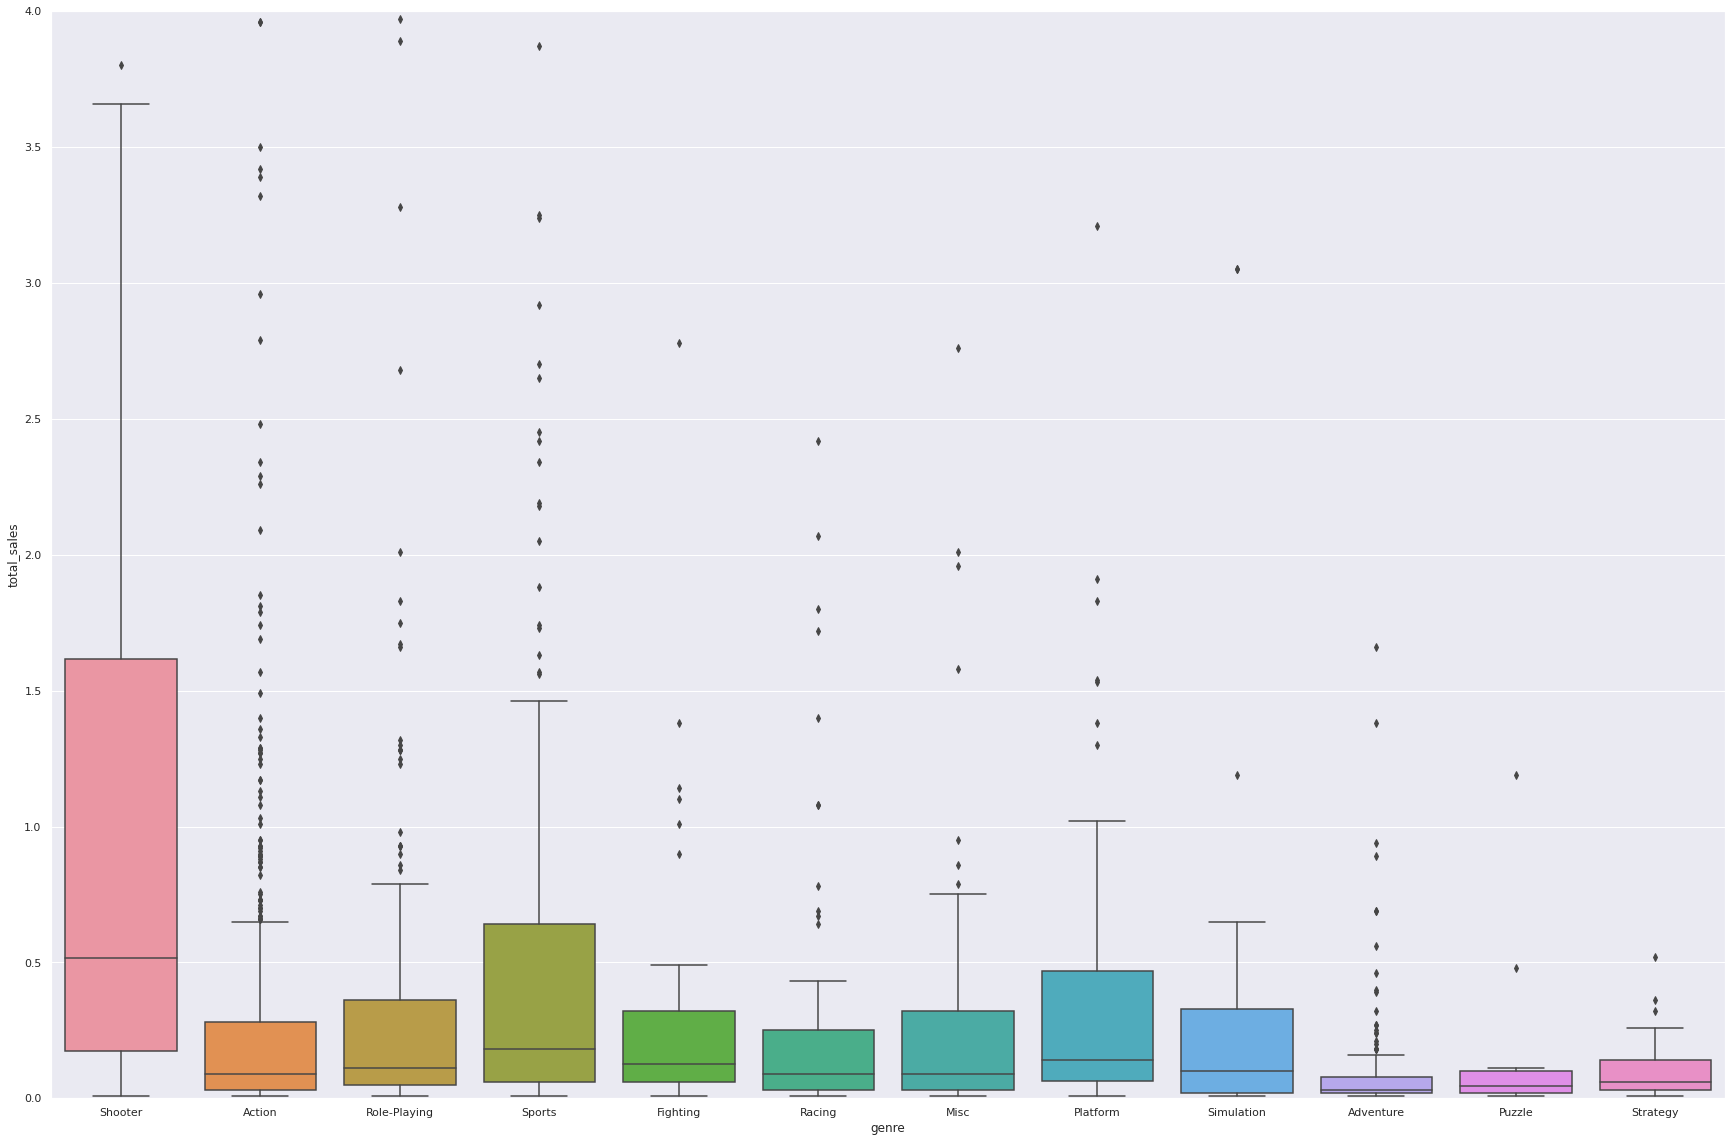

In [42]:
sb.boxplot(data = data_new,x='genre', y='total_sales')
sb.set(rc={'figure.figsize':(30,10)})
plt.ylim(0, 4)

- Потенциально прибыльным можно назвать жанр "Стрелялки"
- На характеристику "стабильный" претендует также жанр "Спортивные игры"

## Портрет пользователя каждого региона

**Идентификация самых популярных платформ (топ-5) в разных регионах**

**Описание различий в долях продаж**

In [43]:
#наиболее популярные платформы в Северной Америке 
for_na = data_new.pivot_table(index = 'platform', values = 'na_sales', aggfunc = 'sum').sort_values(by = 'na_sales', ascending = False).head(5).reset_index()  
display(for_na)

,platform,na_sales
0,PS4,98.61
1,XOne,81.27
2,X360,28.30
3,3DS,22.64
4,PS3,22.05


platform
X360    58.689341
XOne    57.901111
WiiU    45.044207
Wii     41.025641
PS4     34.221760
PS3     32.340862
PC      26.728281
3DS     26.119059
PSV     11.250000
PSP      0.000000
dtype: float64


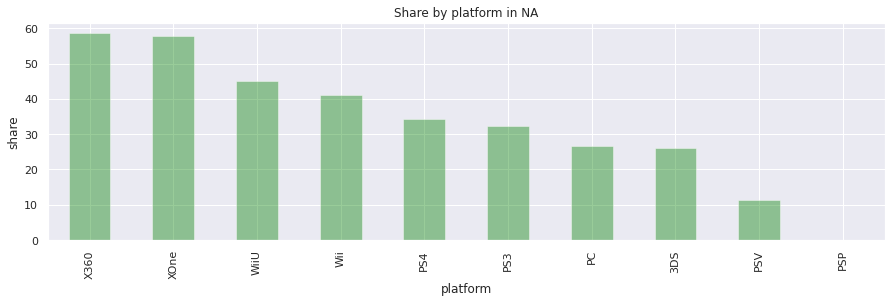

In [44]:
#Доля продаж в Северной Америке в разбивке по платформам
share = (data_new.groupby('platform')['na_sales'].sum()/(data_new.groupby('platform')['total_sales'].sum())*100).sort_values(ascending = False)
ax = share.plot(kind = 'bar', color = 'green', title = 'Share by platform in NA',alpha = 0.4, grid=True, figsize=(15, 4))
ax.set_ylabel("share")
print(share)

На первом месте по продажам в Северной Америке платформа PS4, при этом доля от всех продаж данной платформы не столь большая. Она распространена по всему миру, Северная Америка не центральный потребитель.
В случае с X360 ситуация обратная: Основная доля продаж сконцентрирована в рассматриваемом регионе

In [45]:
#наиболее популярные платформы в Европе
for_eu = data_new.pivot_table(index = 'platform', values = 'eu_sales', aggfunc = 'sum').sort_values(by = 'eu_sales', ascending = False).head(5).reset_index()  
display(for_eu)

,platform,eu_sales
0,PS4,130.04
1,XOne,46.25
2,PS3,25.54
3,PC,17.97
4,3DS,16.12


platform
PC      66.432532
Wii     51.084813
PS4     45.129273
PS3     37.459666
XOne    32.950983
X360    32.123600
WiiU    30.595626
3DS     18.597139
PSV     15.758929
PSP      0.000000
dtype: float64


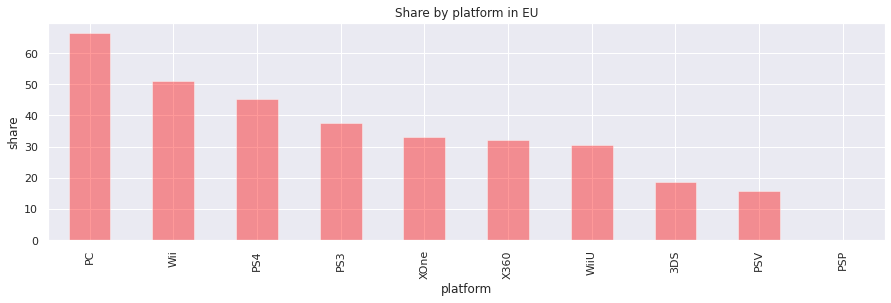

In [46]:
#Доля продаж в Европе в разбивке по платформам
share = (data_new.groupby('platform')['eu_sales'].sum()/(data_new.groupby('platform')['total_sales'].sum())*100).sort_values(ascending = False)
ax = share.plot(kind = 'bar', color = 'red', title = 'Share by platform in EU',alpha = 0.4, grid=True, figsize=(15, 4))
ax.set_ylabel("share")
print(share)

В Европе ситуация аналогична. Рынок PC в большей степени сконцентрирован в Европе, при этом по показателю продаж платформа на 4 месте.

In [47]:
#наиболее популярные платформы в Европе
for_jp = data_new.pivot_table(index = 'platform', values = 'jp_sales', aggfunc = 'sum').sort_values(by = 'jp_sales', ascending = False).head(5).reset_index()  
display(for_jp)

,platform,jp_sales
0,3DS,44.24
1,PS4,15.02
2,PSV,14.54
3,PS3,11.22
4,WiiU,7.31


platform
PSP     100.000000
PSV      64.910714
3DS      51.038302
WiiU     17.007911
PS3      16.456439
PS4       5.212563
XOne      0.227985
X360      0.165906
PC        0.000000
Wii       0.000000
dtype: float64


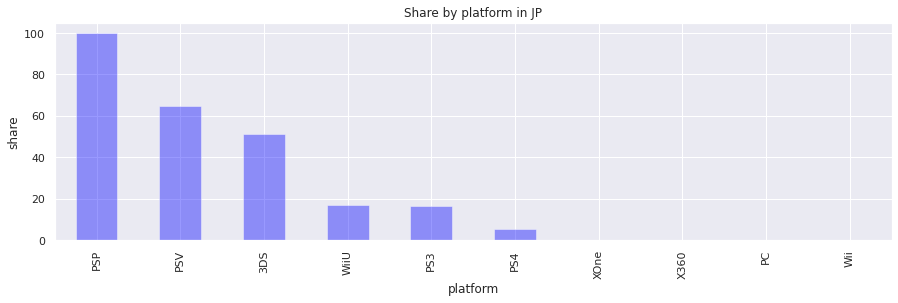

In [48]:
#Доля продаж в Японии в разбивке по платформам
share = (data_new.groupby('platform')['jp_sales'].sum()/(data_new.groupby('platform')['total_sales'].sum())*100).sort_values(ascending = False)
ax = share.plot(kind = 'bar', color = 'blue', title = 'Share by platform in JP',alpha = 0.4, grid=True, figsize=(15, 4))
ax.set_ylabel("share")
print(share)

Все продажи PSP на рассматриваемом временном промежутке были сконцентрированы в Японии. При этом платформа не входит в топ-5 по показателям продаж

**Поиск самых популярных жанров (топ-5). Описание различий**

In [49]:
#свод для продаж по жанрам в разбивке по регионам
table = data_new.pivot_table(index = 'genre', values = ['na_sales','eu_sales', 'jp_sales', 'total_sales','other_sales'], aggfunc = 'sum').sort_values(by = 'na_sales',ascending = False).reset_index()
#создание столбцов с долями
table['eu_share'] = round(table['eu_sales']/table['eu_sales'].sum()*100,1)
table['na_share'] = round(table['na_sales']/table['na_sales'].sum()*100,1)
table['jp_share'] = round(table['jp_sales']/table['jp_sales'].sum()*100,1)

display(table)

,genre,eu_sales,jp_sales,na_sales,other_sales,total_sales,eu_share,na_share,jp_share
0,Shooter,65.52,4.87,79.02,21.53,170.94,24.2,27.8,5.2
1,Action,74.68,29.58,72.53,22.57,199.36,27.6,25.5,31.8
2,Sports,45.73,3.26,46.13,14.36,109.48,16.9,16.2,3.5
3,Role-Playing,28.17,31.16,33.47,8.64,101.44,10.4,11.8,33.5
4,Misc,12.86,5.61,15.05,4.03,37.55,4.8,5.3,6.0
5,Fighting,6.69,6.37,12.43,2.73,28.22,2.5,4.4,6.8
6,Racing,14.13,1.76,8.74,2.89,27.52,5.2,3.1,1.9
7,Platform,6.80,2.69,6.79,1.81,18.09,2.5,2.4,2.9
8,Adventure,6.49,3.60,5.64,1.82,17.55,2.4,2.0,3.9
9,Simulation,7.30,2.31,2.63,0.89,13.13,2.7,0.9,2.5


In [50]:
for_eu_genres = pd.DataFrame(data = table, 
                  columns=['genre', 'eu_share']).sort_values(by = 'eu_share',ascending = False)
#display(for_eu_genres) #таблица с жанрами для Европейских продаж

other_eu_share = for_eu_genres[4:]['eu_share'].sum() # сумма продаж в выбранном регионе для "остальных" жанров
print(f'Доля "Остальных" жанров в Европе равна {other_eu_share}%')
new_row = {'genre':'Other', 'eu_share':other_eu_share} #создание новой строки (обобщающей)

for_eu_genres = for_eu_genres[:4].append(new_row, ignore_index=True) #подготовка данных для круговой диаграммы

display(for_eu_genres)

Доля "Остальных" жанров в Европе равна 21.0%


,genre,eu_share
0,Action,27.6
1,Shooter,24.2
2,Sports,16.9
3,Role-Playing,10.4
4,Other,21.0


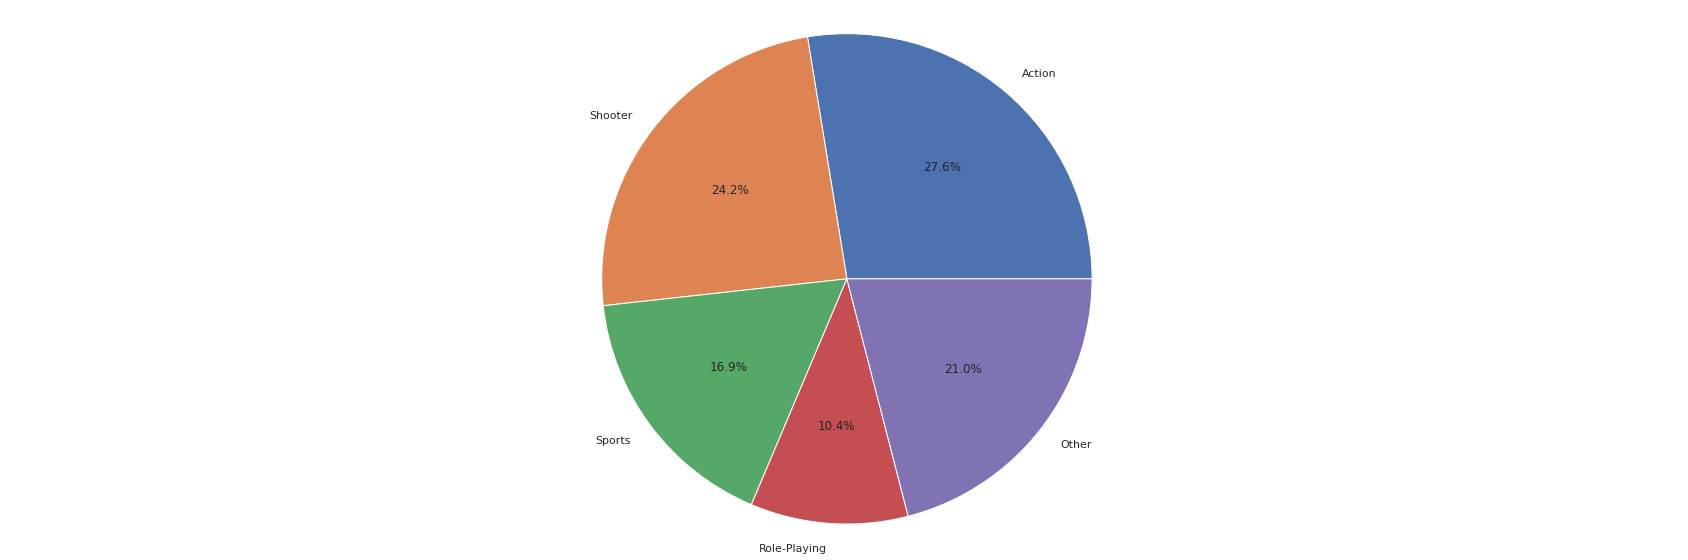

In [51]:
#построение круговой диаграммы для Европы
labels_eu = ['Action', 'Shooter','Sports', 'Role-Playing', 'Other']
sizes_eu = for_eu_genres['eu_share']

fig, ax = plt.subplots()
ax.pie(sizes_eu, labels=labels_eu,autopct='%1.1f%%')
ax.axis('equal')  
plt.show()

In [52]:
for_na_genres = pd.DataFrame(data = table, 
                  columns=['genre', 'na_share']).sort_values(by = 'na_share',ascending = False)
#display(for_na_genres) #таблица с жанрами для продаж Северной Америки

other_na_share = for_na_genres[4:]['na_share'].sum() # сумма продаж в выбранном регионе для "остальных" жанров
print(f'Доля "Остальных" жанров в Северной Америке равна {other_na_share}%')
new_row = {'genre':'Other', 'na_share':other_na_share} #создание новой строки (обобщающей)

for_na_genres = for_na_genres[:4].append(new_row, ignore_index=True) #подготовка данных для круговой диаграммы

display(for_na_genres)

Доля "Остальных" жанров в Северной Америке равна 18.599999999999998%


,genre,na_share
0,Shooter,27.8
1,Action,25.5
2,Sports,16.2
3,Role-Playing,11.8
4,Other,18.6


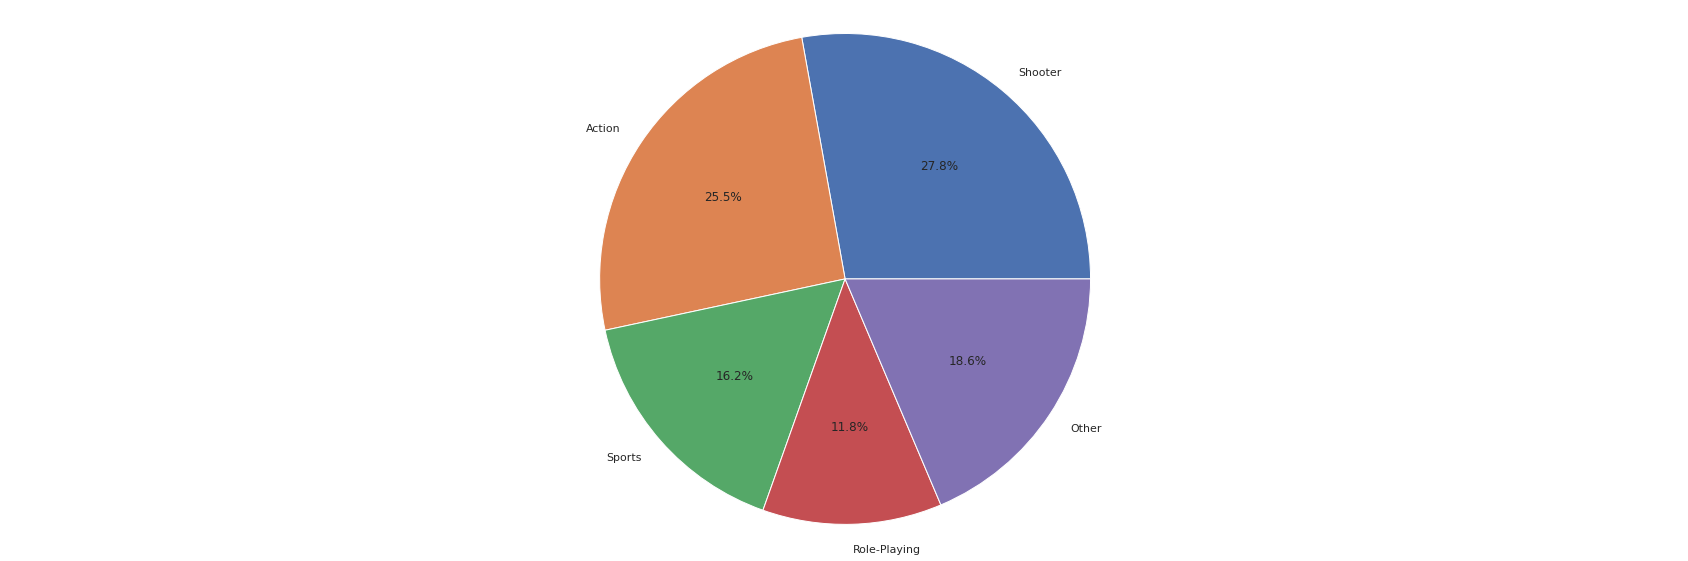

In [53]:
#построение круговой диаграммы для Северной Америки
labels_na = ['Shooter','Action','Sports', 'Role-Playing', 'Other']
sizes_na = for_na_genres['na_share']

fig, ax = plt.subplots()
ax.pie(sizes_na, labels=labels_na,autopct='%1.1f%%')
ax.axis('equal')  
plt.show()

In [54]:
for_jp_genres = pd.DataFrame(data = table, 
                  columns=['genre', 'jp_share']).sort_values(by = 'jp_share',ascending = False)
#display(for_jp_genres) #таблица с жанрами для продаж в Японии

other_jp_share = for_jp_genres[4:]['jp_share'].sum() # сумма продаж в выбранном регионе для "остальных" жанров
print(f'Доля "Остальных" жанров равна {other_jp_share}%')
new_row = {'genre':'Other', 'jp_share':other_jp_share} #создание новой строки (обобщающей)

for_jp_genres = for_jp_genres[:4].append(new_row, ignore_index=True) #подготовка данных для круговой диаграммы

display(for_jp_genres)

Доля "Остальных" жанров равна 21.9%


,genre,jp_share
0,Role-Playing,33.5
1,Action,31.8
2,Fighting,6.8
3,Misc,6.0
4,Other,21.9


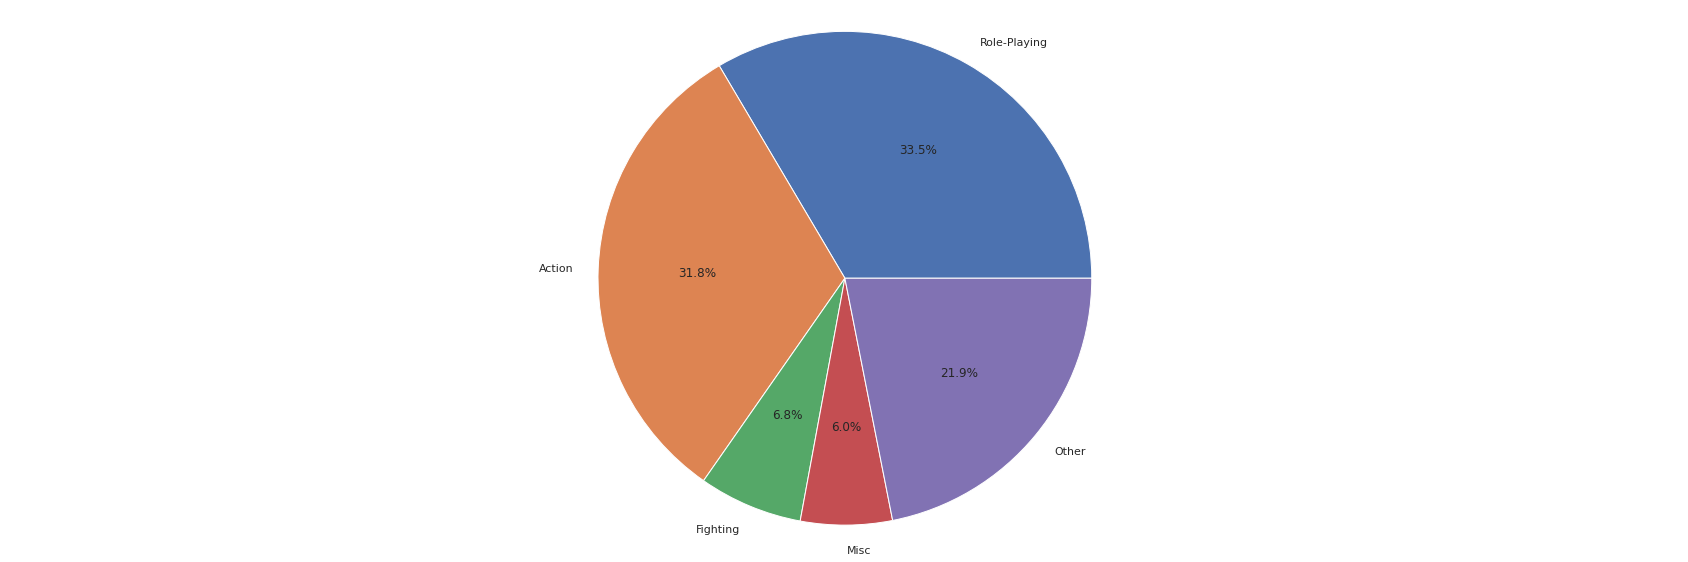

In [55]:
#построение круговой диаграммы для Японии
labels_jp = ['Role-Playing','Action', 'Fighting','Misc', 'Other']
sizes_jp = for_jp_genres['jp_share']

fig, ax = plt.subplots()
ax.pie(sizes_jp, labels=labels_jp,autopct='%1.1f%%')
ax.axis('equal')  
plt.show()

Наиболее популярные жанры 
в Северной Америке: **Shooter**, **Action**, **Sports**
в Европе: **Action**, **Shooter**, **Sports**
в Японии: **Role-Playing**, **Action**, **Fighting**

Предпочтения потребителей в Японии отличаются от предпочтений потребителей Северной Америки и Европы

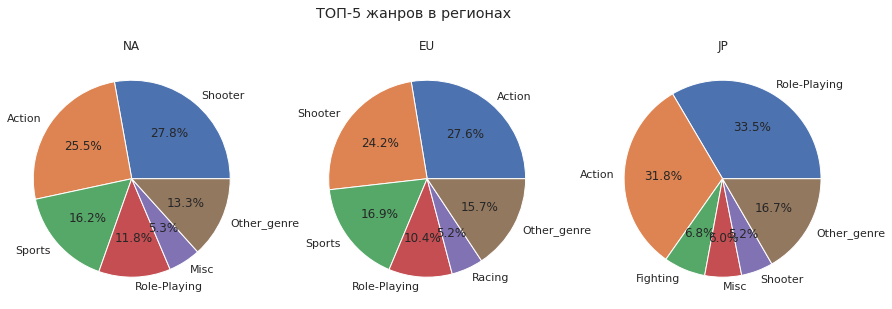

In [63]:
# Или
games_fresh = data_new.copy()
countries = games_fresh.columns[4:7]
# начертим круговую диаграмму для каждого региона
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('ТОП-5 жанров в регионах')
for i in range(3):
  # выберем 5 самых продающих жанров
  df_i = (games_fresh.groupby('genre')[countries[i]].sum().
             reset_index().
             sort_values(countries[i], ascending = False, ignore_index = True).
             head(5))
  # занесем все остальыне продажи в другие жанры
  df_i = df_i.append({'genre': 'Other_genre', countries[i]: games_fresh[countries[i]].sum() - df_i[countries[i]].sum()}, ignore_index= True)
  axs[i].pie(df_i[countries[i]], labels = df_i['genre'], autopct='%1.1f%%')
  # Зададим название региона.
  axs[i].set_title(df_i.columns[1].split('_')[0].upper())
plt.show()

**Влияние рейтинга ESRB на продажи в отдельном регионе**

,eu_sales,jp_sales,na_sales
rating_category,,,
17+,93.44,8.01,96.42
Рейтинг не составлен,58.95,56.90,64.72
Все,58.06,8.94,50.74
Для подростков,34.07,14.78,38.95
Все 10+,26.16,4.46,33.23


Text(0, 0.5, 'sales')

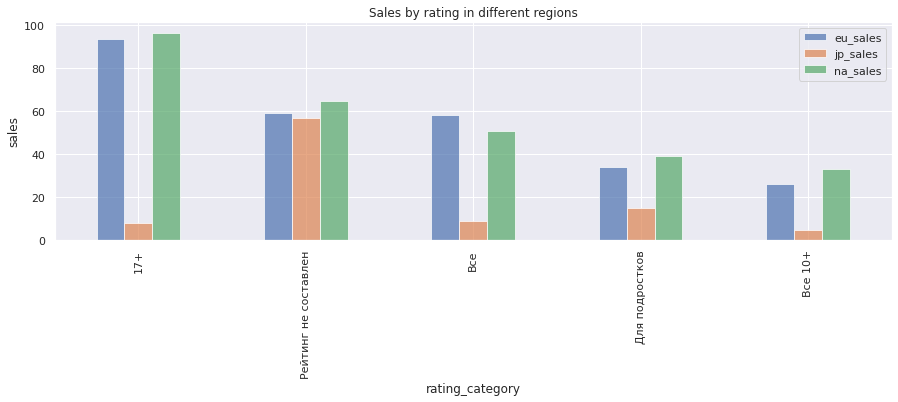

In [58]:
for_rating_pivot = data_new.pivot_table(index = 'rating_category', values = ['na_sales','eu_sales', 'jp_sales'], aggfunc = 'sum').sort_values(by = 'na_sales',ascending = False)
display(for_rating_pivot)
ax = for_rating_pivot.plot(kind = 'bar', title = 'Sales by rating in different regions',alpha = 0.7, figsize=(15, 4))
ax.set_ylabel("sales")

* Наибольшие показатели продаж в Европе имеют игры с рейтингом **17+**
* Наибольшие показатели продаж в Северной Америке имеют игры с рейтингом **17+**
* В Японии - игры без маркировки

In [59]:
# для проверки
temp = data_new.copy()
print(temp.rating.isna().sum(), temp.rating.isna().sum()/len(temp))
temp.rating.value_counts()

749 0.443457667258733


T       271
M       265
E       219
E10+    185
Name: rating, dtype: int64

## Проверка гипотез

Пороговое значение устанавливается на уровне 5%

**Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**

*Нулевая гипотеза:* Cредние пользовательские оценки платформы Xbox = Cредние пользовательские оценки платформы PC

*Альтернативная гипотеза:* Cредние пользовательские оценки платформы Xbox ≠ Cредние пользовательские оценки платформы PC

*Способ проверки:* ttest

In [60]:
# вспомогательные действия
data_new['platform'].unique() #перечень платформ в выбранном датасете
data_new_for_hyp = data_new.query('~user_score.isna()') #очистка от пропущенных значений в user_score
data_new_for_hyp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 888 entries, 42 to 16692
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             888 non-null    object 
 1   platform         888 non-null    object 
 2   year_of_release  888 non-null    int64  
 3   genre            888 non-null    object 
 4   na_sales         888 non-null    float64
 5   eu_sales         888 non-null    float64
 6   jp_sales         888 non-null    float64
 7   other_sales      888 non-null    float64
 8   critic_score     704 non-null    float64
 9   user_score       888 non-null    float64
 10  rating           852 non-null    object 
 11  total_sales      888 non-null    float64
 12  rating_category  888 non-null    object 
dtypes: float64(7), int64(1), object(5)
memory usage: 97.1+ KB


In [61]:
alpha = 0.05 #уровень значимости
print("Средняя пользовательская оценка для платформы XOne", round(data_new_for_hyp[data_new_for_hyp['platform'] == 'XOne']['user_score'].mean(),1))
print("Средняя пользовательская оценка для платформы PC", round(data_new_for_hyp[data_new_for_hyp['platform'] == 'PC']['user_score'].mean(),2))
print("Генеральные совокупности не зависят друг от друга")
for_xbox_one = data_new_for_hyp[data_new_for_hyp['platform'] == 'XOne']['user_score']
for_pc = data_new_for_hyp[data_new_for_hyp['platform'] == 'PC']['user_score']

results = st.ttest_ind(
    for_xbox_one,
    for_pc)

print('p-значение:', results.pvalue) # вывод значения p-value

if results.pvalue < alpha: # условный оператор с выводом строки с ответом
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Средняя пользовательская оценка для платформы XOne 6.6
Средняя пользовательская оценка для платформы PC 6.3
Генеральные совокупности не зависят друг от друга
p-значение: 0.10450507919348415
Не получилось отвергнуть нулевую гипотезу


Значение p-value равно почти 10%.

Слишком большая вероятность, чтобы делать вывод о значимом различии между пользовательскими оценками.

**Средние пользовательские рейтинги жанров Action и Sports разные**

*Нулевая гипотеза:* Cредние пользовательские оценки жанра Action = Cредние пользовательские оценки жанра Sports

*Альтернативная гипотеза:* Cредние пользовательские оценки жанра Action ≠ Cредние пользовательские оценки жанра Sports

*Способ проверки:* ttest

In [62]:
alpha = 0.05 #уровень значимости

print("Генеральные совокупности не зависят друг от друга")
for_action = data_new_for_hyp[data_new_for_hyp['genre'] == 'Action']['user_score']
for_sports = data_new_for_hyp[data_new_for_hyp['genre'] == 'Sports']['user_score']

results = st.ttest_ind(
    for_action,
    for_sports)

print('p-значение:', results.pvalue) # вывод значения p-value

if results.pvalue < alpha: # условный оператор с выводом строки с ответом
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Генеральные совокупности не зависят друг от друга
p-значение: 2.8711147985105864e-19
Отвергаем нулевую гипотезу


Нулевая гипотеза о равенстве средних пользовательских оценок двух разных жанров отвергается

## Общий вывод

<div style="border-radius: 2px; box-shadow: 2px 2px 4px; border: 1px solid; background:Gainsboro; padding: 20px">
    
В результате проведенного исследования был детально изучен датасет с данными о продажах игр, оценках пользователей и экспертов, жанрах и платформах.

В центре исследования были основные характеристики игр (год выпуска, жанр, продажи в Северной Америке, Европе и Японии, рейтинг, общие продажи, а также пользовательские и экспертные оценки)

**Предобработка данных**
    
*В первую очередь были идентифицированы и заменены/очищены пропущенные значения и скорректированы типы данных (где было необходимо):*
    
- Переменные **name** и **genre** были пропущены в двух одинаковых наблюдениях -> строки были удалены;
    
- Год выпуска (**year_of_release**) был пропущен в 269 случаях - 1,6% < 10% датасета -> строки были удалены;
    
- Доля пропущенных значений в рейтинге (**rating**) и оценках пользователей (**user_score**) и экспертов (**critic_score**) слишком велика, а замена медианными/средними значениями не была обоснованной -> пропуски были не тронуты;

- Типы данных в столбцах **user_score** и **year_of_release** были преобразованы;
    
- Была решена проблема, связанная с tbd в столбце **user_score**;
    
- В исходный датасет был добавлен необходимый для исследовательского анализа расчетный столбец:
    
    * **total_sales** - суммарные продажи во всех регионах
    

**Исследовательский анализ данных**  

Из примечательного: 

- Была продемонстрирована статистика выпуска игр по годам за период с 1980 по 2016;
    
- Наибольшее количество игр было выпущено в 2008-2009 годах.
До начала 2000-х было выпущено малое количество игр - выявлять закономерности, определяющие успех той или иной игры лучше на временном промежутке, характеризующимя ростом активности в изучаемой индустрии;
    
- Наибольшее количество игр было выпущено платформами PS2, DS и PS3, а наибольшие совокупные продажи приходятся на платформы PS2, X360 и PS3;

- Почти для каждой "крупной" платформы есть пик продаж (или несколько, если, например, не одна игра имела большой успех), после которого цифры падают, а платформы исчезают;

- Наиболее "успешные" платформы функционируют около 6-10 лет;
    
- Из-за меняющихся тенденций было принято решение обращаться к наиболее актуальным данным: 2014 - 2016 годы;
    
- На наиболее актуальном временном промежутке список "лидеров" преобразовался;

- Совокупные продажи по всем "игрокам" изучаемого рынка на промежутке с 2015 по 2016 снижались;

- Наиболее "успешными" можно назвать платформы PS4 и XOne;

При более подробном рассмотрении платформ было выявлено:

- Чаще всего мы не можем сказать, что при увеличении оценок пользователей показатели продаж увеличиваются. Даже при не очень высоких пользовательских оценках продажи могут быть высокими;

- В среднем при прочих равных при увеличении оценки критиков увеличиваются и показатели продаж;

- Для экспертных оценок присутствует не очень высокая зависимость, а для пользовательских оценок корреляции нет.

Описанные выше рассуждения для одной платформы подтверждаются при рассмотрении продаж по всем платформам:
    
Кроме того, 

- Потенциально прибыльным можно назвать жанр "Стрелялки"
- На характеристику "стабильный" претендует также жанр "Спортивные игры"

**Портрет пользователя каждого региона**
    
Были идентифицированы наиболее популярные платформы и жанры в Северной Америке, Европе и Японии. Также было изучено влияние рейтинга ESRB на продажи в отдельных регионах.

* Наибольшие показатели продаж в Европе имеют игры с рейтингом **17+**
* Наибольшие показатели продаж в Северной Америке имеют игры с рейтингом **17+**
* В Японии - игры без маркировки
    
**Проверка гипотез**

*Средние пользовательские рейтинги платформ Xbox One и PC одинаковые*

Значение p-value равно почти 10% - слишком большая вероятность, чтобы делать вывод о значимом различии между пользовательскими оценками (Нулевая гипотеза не отвергнута).

*Средние пользовательские рейтинги жанров Action и Sports разные*
    
Нулевая гипотеза о равенстве средних пользовательских оценок двух разных жанров была отвергнута

Таким образом, совокупность проведенных проверок и сформулированные выводы могут помочь в идентификации потенциально популярного продукта и планировании рекламных кампаний.

</div>

<div style="border-radius: 2px; box-shadow: 2px 2px 4px; border: 1px solid; background:Gainsboro; padding: 20px">
Рекламный бюджет в целом можно направить на игры платформ PS4 или XOne
    
    
**Необходимо принимать во внимание тот факт, что предпочтения потребителей в Японии отличаются от предпочтений потребителей Северной Америки и Европы**

Жанры:
    
 - в Северной Америке и Европе: **Shooter**, **Action** или **Sports**
 - в Японии: **Role-Playing**, **Action** или **Fighting**
    
Рейтинг: 
 - в Северной Америке и Европе: **17+**
 - в Японии: на рейтинге ESRB можно не концентрироваться

Оценки: 
    
Потенциально более прибыльными являются игры с высокими экспертными оценками. Оценки пользователей в этом отношении менее значимы
    
</div>

**Чек-лист готовности проекта**

**Выгрузка данных**

- [x]  открыт файл с данными
- [x]  изучена общая информация

**Подготовка данных**

- [x]  определены пропущенные значения
- [x]  изменены названия столбцов(приведены к нижнему регистру)
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  есть пояснение, какие пропущенные значения обнаружены и почему они заменены/не заменены выбранным способом
- [x]  описаны причины, которыее могли привести к пропускам
- [x]  уделено внимание аббревиатуре 'tbd' в столбце с оценкой пользователей - описан способ обработки
- [x]  посчитаны и записаны в отдельный столбец суммарные продажи во всех регионах

**Исследовательский анализ данных**

- [x]  выполнено задание: Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
- [x]  выполнено задание: Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
- [x]  выполнено задание: Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
- [x]  выполнено задание: Не учитывайте в работе данные за предыдущие годы.
- [x]  выполнено задание: Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
- [x]  выполнено задание: Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
- [x]  выполнено задание: Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
- [x]  выполнено задание: Соотнесите выводы с продажами игр на других платформах.
- [x]  выполнено задание: Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

**Портрет пользователя каждого региона**

- [x]  Определены для пользователя каждого региона (NA, EU, JP):
        - Самые популярные платформы (топ-5). Опишите различия в долях продаж
        - Найдены самые популярные жанры (топ-5). Приведено пояснение разницы
        - Дан ответ на вопрос: Влияет ли рейтинг ESRB на продажи в отдельном регионе?
     
**Проверка гипотез**

- [x]  Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
- [x]  Средние пользовательские рейтинги жанров Action и Sports разные
- [x]  пороговое значение alpha задано самостоятельно, приведено пояснение:
     - Как была сформулирована нулевая и альтернативная гипотезы
     - Какой критерий был применен для проверки гипотез и почему
     
    
**Общий вывод**

- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод